# Solar energy forecasting NEMA zone

In [39]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt    
import xgboost as xgb 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

from sklearn.preprocessing import MinMaxScaler 

In [40]:
df = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2012//NEMA//Boston 2012-01-01 to 2012-12-31.csv') 


In [41]:
df_NEMA_weather_2012 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2012//NEMA//Boston 2012-01-01 to 2012-12-31.csv')
df_NEMA_weather_2013 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2013//NEMA//Boston 2013-01-01 to 2013-12-31.csv')
df_NEMA_weather_2014 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2014//NEMA//Boston 2014-01-01 to 2014-12-31.csv')
df_NEMA_weather_2015 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2015//NEMA//Boston 2015-01-01 to 2015-12-31.csv')
df_NEMA_weather_2016 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2016//NEMA//Boston 2016-01-01 to 2016-12-31.csv')
df_NEMA_weather_2017 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2017//NEMA//Boston 2017-01-01 to 2017-12-31.csv')  
df_NEMA_weather_2018 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2018//NEMA//Boston 2018-01-01 to 2018-12-31.csv') 
df_NEMA_weather_2019 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2019//NEMA//Boston 2019-01-01 to 2019-12-31.csv')  
df_NEMA_weather_2020 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2020//NEMA//Boston 2020-01-01 to 2020-12-31.csv') 
df_NEMA_weather_2021 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2021//NEMA//Boston 2021-01-01 to 2021-12-31.csv')  
df_NEMA_weather_2022 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2022//NEMA//Boston 2022-01-01 to 2022-12-31.csv')  
df_NEMA_weather_2023 = pd.read_csv(r'C://Users//Talha//Desktop//Electric Load Forecasting//Weather//2023//NEMA//Boston 2023-01-01 to 2023-12-31.csv')

In [42]:
df_NEMA_final_weather = pd.concat([df_NEMA_weather_2012,df_NEMA_weather_2013,df_NEMA_weather_2014,df_NEMA_weather_2015,
                                   df_NEMA_weather_2016 ,df_NEMA_weather_2017, df_NEMA_weather_2018, df_NEMA_weather_2019,
                                   df_NEMA_weather_2020, df_NEMA_weather_2021, df_NEMA_weather_2022], ignore_index=True) 
print(df_NEMA_final_weather)

                  datetime   temp  humidity  precipprob  windspeed  \
0      2012-01-01 00:00:00   38.8     86.63           0       12.4   
1      2012-01-01 01:00:00   39.0     85.76           0        8.9   
2      2012-01-01 02:00:00   38.9     85.79           0        9.0   
3      2012-01-01 03:00:00   40.6     81.48           0        9.0   
4      2012-01-01 04:00:00   42.2     76.90           0       10.2   
...                    ...    ...       ...         ...        ...   
96427  2022-12-31 19:00:00   53.2     99.74         100        6.7   
96428  2022-12-31 20:00:00   52.2     99.73         100        6.8   
96429  2022-12-31 21:00:00   53.2     99.67         100        7.9   
96430  2022-12-31 22:00:00   52.2     99.68         100        6.8   
96431  2022-12-31 23:00:00   52.2     99.80         100        6.7   

       sealevelpressure  cloudcover  solarradiation  solarenergy  
0                1012.9         0.0             0.0          0.0  
1                1012.8  

In [43]:
# for solar radiation forecasting, we will be using parameters such as precipication, and wind speed, hour of day, day of year

In [44]:
df_NEMA_final_weather.isnull().sum()

datetime             0
 temp                0
humidity             0
precipprob           0
windspeed            0
sealevelpressure     0
cloudcover           0
solarradiation      22
solarenergy         22
dtype: int64

In [45]:
df_NEMA_final_weather['solarradiation'].fillna(int(df_NEMA_final_weather['solarradiation'].mean()), inplace=True)  
df_NEMA_final_weather['solarenergy'].fillna(int(df_NEMA_final_weather['solarenergy'].mean()), inplace=True) 

C:\Users\Talha\AppData\Local\Temp\ipykernel_13276\2172747306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_NEMA_final_weather['solarradiation'].fillna(int(df_NEMA_final_weather['solarradiation'].mean()), inplace=True)
C:\Users\Talha\AppData\Local\Temp\ipykernel_13276\2172747306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

In [46]:
df_NEMA_final_weather.isnull().sum()

datetime            0
 temp               0
humidity            0
precipprob          0
windspeed           0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
dtype: int64

In [47]:
df_NEMA_final_weather = df_NEMA_final_weather.drop(columns=[' temp', 'humidity', 'sealevelpressure', 'cloudcover', 'solarenergy']) 

In [48]:
df_NEMA_final_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        96432 non-null  object 
 1   precipprob      96432 non-null  int64  
 2   windspeed       96432 non-null  float64
 3   solarradiation  96432 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ MB


In [49]:
df_NEMA_final_weather.shape

(96432, 4)

In [50]:
df_NEMA_final_weather.head(10)

,datetime,precipprob,windspeed,solarradiation
0,2012-01-01 00:00:00,0,12.4,0.0
1,2012-01-01 01:00:00,0,8.9,0.0
2,2012-01-01 02:00:00,0,9.0,0.0
3,2012-01-01 03:00:00,0,9.0,0.0
4,2012-01-01 04:00:00,0,10.2,0.0
5,2012-01-01 05:00:00,0,6.8,0.0
6,2012-01-01 06:00:00,0,7.8,0.0
7,2012-01-01 07:00:00,0,7.8,13.5
8,2012-01-01 08:00:00,0,6.7,97.5
9,2012-01-01 09:00:00,0,6.7,246.3


In [51]:
df = df_NEMA_final_weather

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        96432 non-null  object 
 1   precipprob      96432 non-null  int64  
 2   windspeed       96432 non-null  float64
 3   solarradiation  96432 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ MB


<Axes: ylabel='precipprob'>

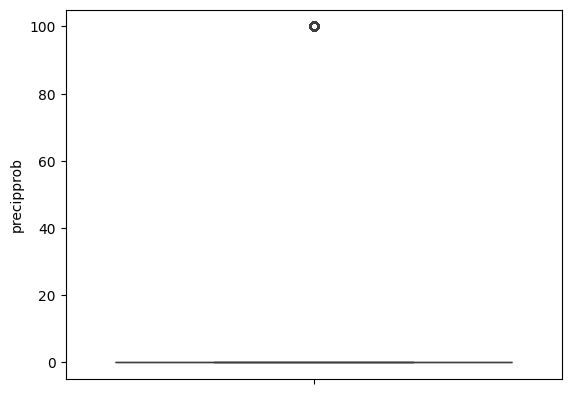

In [53]:
# Check outliers
sns.boxplot(df['precipprob'])

<Axes: ylabel='windspeed'>

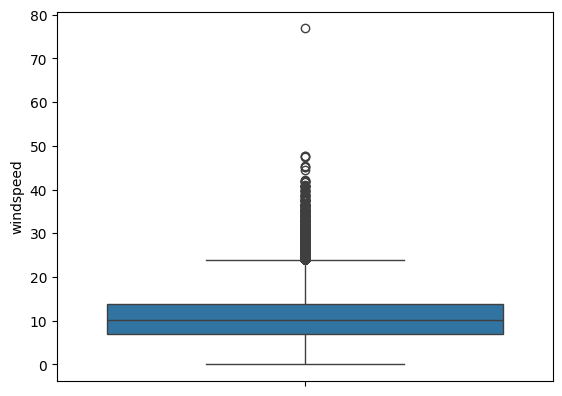

In [54]:
# Check outliers
sns.boxplot(df['windspeed'])

In [55]:
# Outliers Cleaning   
# there is an outliers therefore we want to try to find limits of it
# after finding limit we use capping technique that change the outlier values
# to upper or lower limit values, additionally, used ınterquatile method
new_df_1 = df
q1 = new_df_1['windspeed'].quantile(0.25) 
q3 = new_df_1['windspeed'].quantile(0.75) 
iqr = q3 - q1 

upper_limit_1 = q3 + (1.5 * iqr) 
lower_limit_1 = q1 - (1.5 * iqr) 
print('upper_limit:', upper_limit_1) 
print('lower_limit:', lower_limit_1)  

new_df_1 = df.copy() 
new_df_1.loc[(new_df_1['windspeed']>upper_limit_1), 'windspeed'] = upper_limit_1 
new_df_1.loc[(new_df_1['windspeed']<lower_limit_1), 'windspeed'] = lower_limit_1

upper_limit: 23.9
lower_limit: -3.299999999999999


<Axes: ylabel='windspeed'>

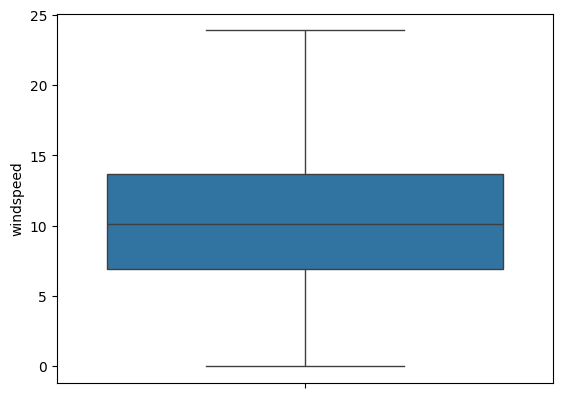

In [56]:
sns.boxplot(new_df_1['windspeed'])

<Axes: ylabel='solarradiation'>

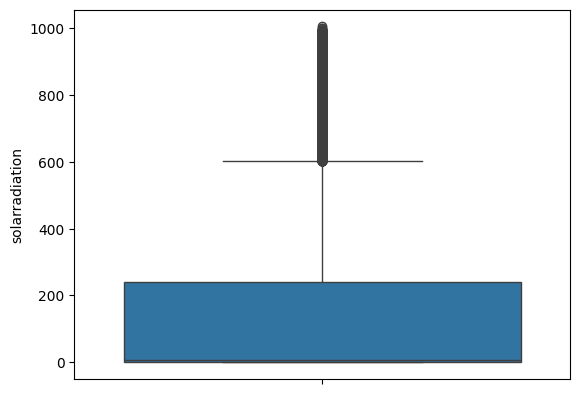

In [57]:
# Check outliers
sns.boxplot(df['solarradiation'])

In [58]:
# Outliers Cleaning   
# there is an outliers therefore we want to try to find limits of it
# after finding limit we use capping technique that change the outlier values
# to upper or lower limit values, additionally, used ınterquatile method
new_df_1 = df
q1 = new_df_1['solarradiation'].quantile(0.25) 
q3 = new_df_1['solarradiation'].quantile(0.75) 
iqr = q3 - q1 

upper_limit_1 = q3 + (1.5 * iqr) 
lower_limit_1 = q1 - (1.5 * iqr) 
print('upper_limit:', upper_limit_1) 
print('lower_limit:', lower_limit_1)  

new_df_1 = df.copy() 
new_df_1.loc[(new_df_1['solarradiation']>upper_limit_1), 'solarradiation'] = upper_limit_1 
new_df_1.loc[(new_df_1['solarradiation']<lower_limit_1), 'solarradiation'] = lower_limit_1

upper_limit: 602.5
lower_limit: -361.5


<Axes: ylabel='solarradiation'>

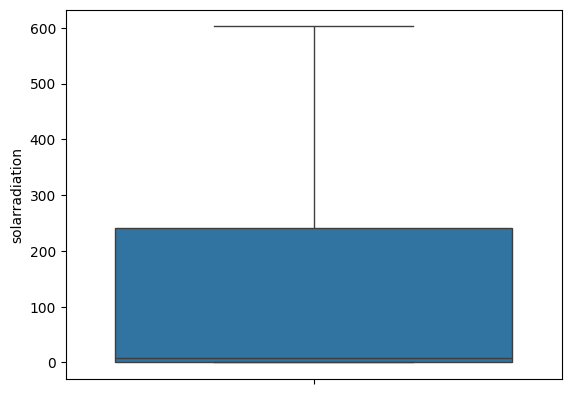

In [59]:
# Check outliers
sns.boxplot(new_df_1['solarradiation'])

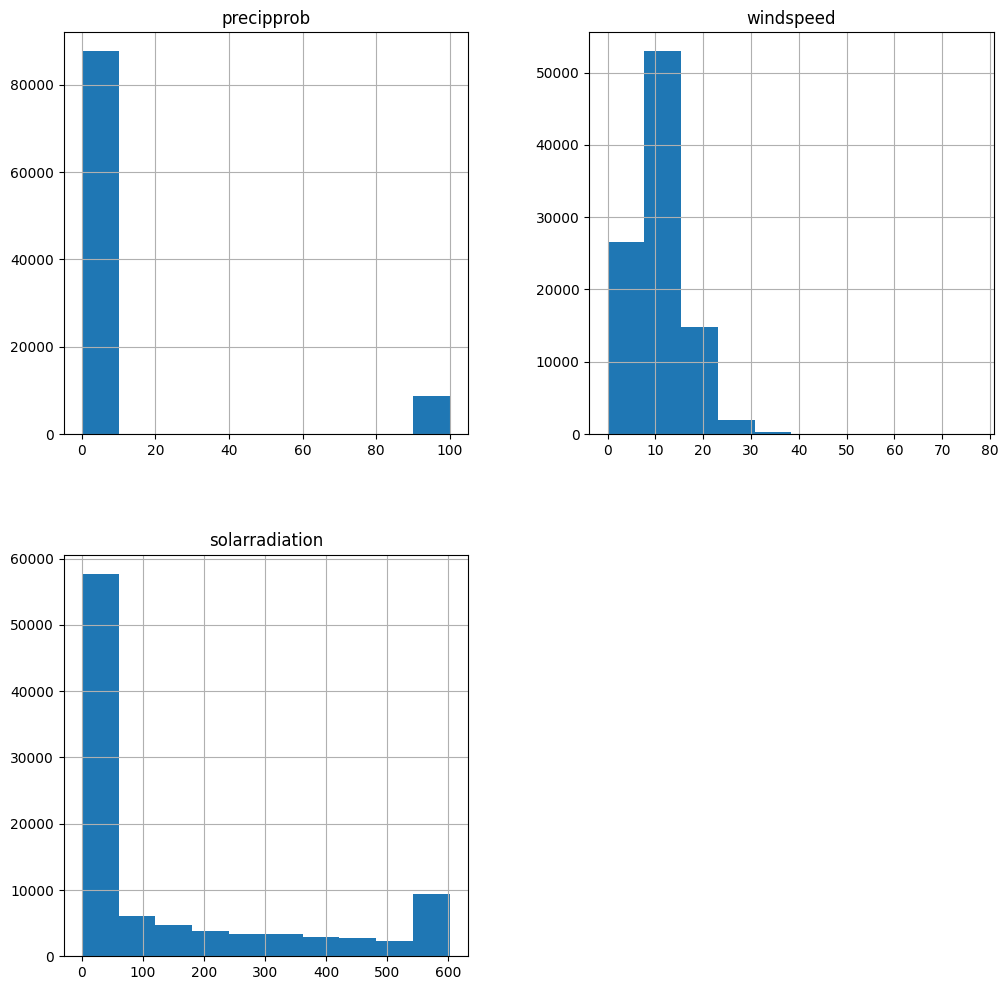

In [60]:
new_df_1.hist(figsize=(12,12))
plt.show()

In [61]:
#Setting index to Datetime
new_df_1 = new_df_1.set_index('datetime')
new_df_1.index = pd.to_datetime(new_df_1.index)

In [62]:
def create_features(df):

    df = df.copy()
    df['hourofday'] = df.index.hour
    df['dayofyear'] = df.index.dayofyear
    return df

new_df_1 = create_features(new_df_1) 
new_df_1

,precipprob,windspeed,solarradiation,hourofday,dayofyear
datetime,,,,,
2012-01-01 00:00:00,0,12.4,0.0,0,1
2012-01-01 01:00:00,0,8.9,0.0,1,1
2012-01-01 02:00:00,0,9.0,0.0,2,1
2012-01-01 03:00:00,0,9.0,0.0,3,1
2012-01-01 04:00:00,0,10.2,0.0,4,1
...,...,...,...,...,...
2022-12-31 19:00:00,100,6.7,0.0,19,365
2022-12-31 20:00:00,100,6.8,0.0,20,365
2022-12-31 21:00:00,100,7.9,0.0,21,365


In [64]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2012-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precipprob      96432 non-null  int64  
 1   windspeed       96432 non-null  float64
 2   solarradiation  96432 non-null  float64
 3   hourofday       96432 non-null  int32  
 4   dayofyear       96432 non-null  int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 3.7 MB


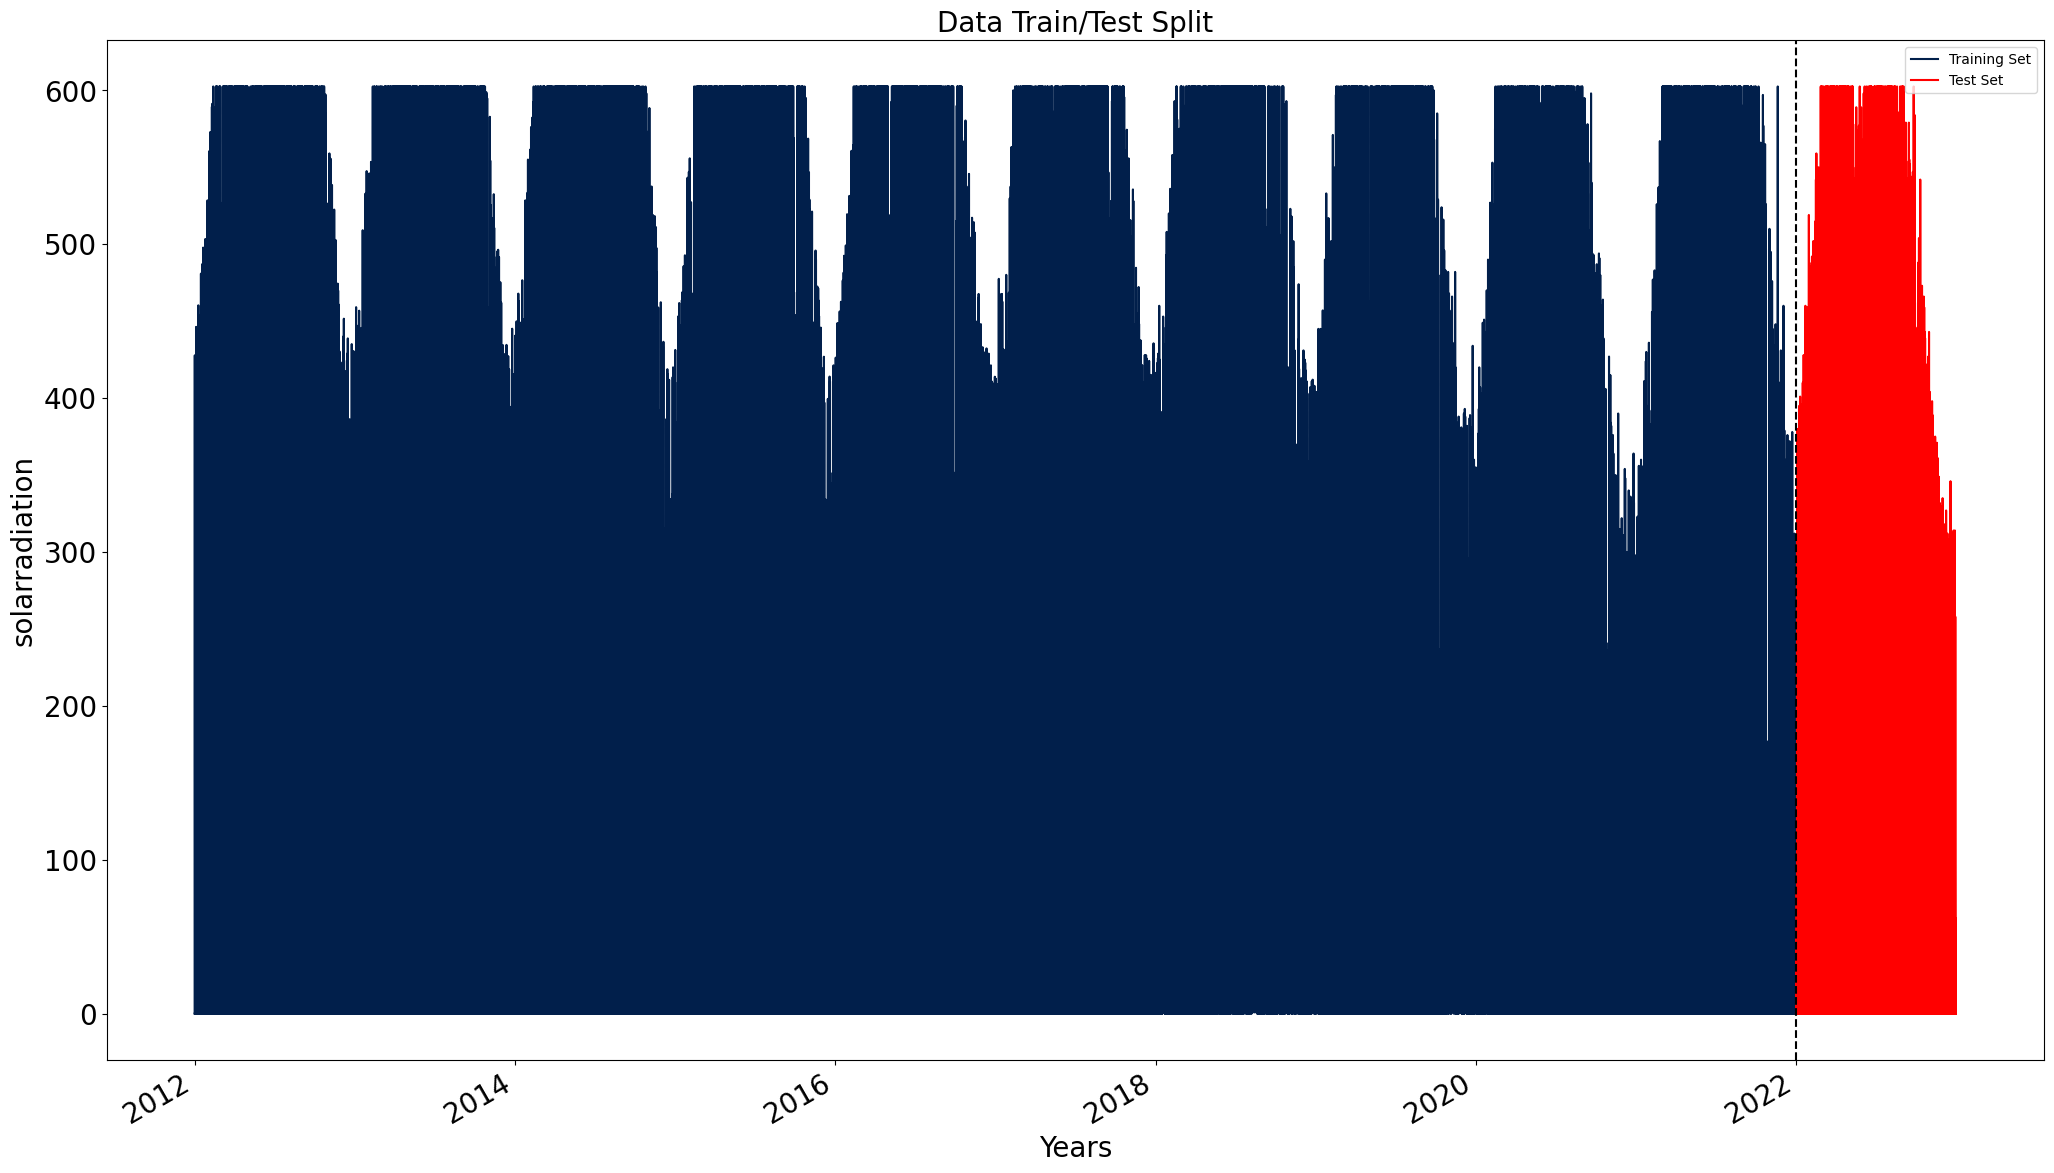

In [65]:
#Train and Test Split
df = new_df_1['solarradiation']

train = df.loc[df.index < '01-01-2022']
test = df.loc[df.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(25, 15))

train.plot(ax=ax, label='Training Set', title='Data Train/Test Split', color = "#011f4b")
test.plot(ax=ax, label='Test Set', color="red")

ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])

plt.title('Data Train/Test Split', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('solarradiation', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#Generating plot
plt.show()

In [66]:
new_df_1.columns

Index(['precipprob', 'windspeed', 'solarradiation', 'hourofday', 'dayofyear'], dtype='object')

In [67]:
list_of_scale = ['precipprob', 'windspeed', 'solarradiation', 'dayofyear', 'hourofday']

# MinMaxScaler
scaler = MinMaxScaler()
new_df_1[list_of_scale] = scaler.fit_transform(new_df_1[list_of_scale]) 

In [68]:
# Our Training data goes from 1st January of 2012 until 31th of december of 2021, which is encompasses 10 years
X_train = new_df_1.loc[:'01-01-2022',['precipprob', 'windspeed', 'dayofyear', 'hourofday']]
y_train = new_df_1.loc[:'01-01-2022', ['solarradiation']]

# Our Testing data goes from 1st January of 2022 until 31th of December of 2022, which we took 1 year for testing
X_test = new_df_1.loc['01-01-2022':,['precipprob', 'windspeed', 'dayofyear', 'hourofday']]
y_test = new_df_1.loc['01-01-2022':,['solarradiation']]

In [69]:
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)

(87696, 4)
(87696, 1)
(8760, 4)
(8760, 1)


In [70]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=10000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.3, 
                       random_state = 48)

reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100) 

[0]	validation_0-rmse:0.33759	validation_1-rmse:0.33198


c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.14219	validation_1-rmse:0.15042
[200]	validation_0-rmse:0.14007	validation_1-rmse:0.15050
[300]	validation_0-rmse:0.13887	validation_1-rmse:0.15070
[400]	validation_0-rmse:0.13810	validation_1-rmse:0.15094
[500]	validation_0-rmse:0.13747	validation_1-rmse:0.15118
[600]	validation_0-rmse:0.13699	validation_1-rmse:0.15149
[700]	validation_0-rmse:0.13659	validation_1-rmse:0.15181
[800]	validation_0-rmse:0.13621	validation_1-rmse:0.15198
[900]	validation_0-rmse:0.13587	validation_1-rmse:0.15209
[1000]	validation_0-rmse:0.13559	validation_1-rmse:0.15208
[1100]	validation_0-rmse:0.13532	validation_1-rmse:0.15236
[1200]	validation_0-rmse:0.13509	validation_1-rmse:0.15240
[1300]	validation_0-rmse:0.13488	validation_1-rmse:0.15253
[1400]	validation_0-rmse:0.13467	validation_1-rmse:0.15264
[1500]	validation_0-rmse:0.13447	validation_1-rmse:0.15268
[1600]	validation_0-rmse:0.13429	validation_1-rmse:0.15267
[1700]	validation_0-rmse:0.13412	validation_1-rmse:0.15275
[1800]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [71]:
##Merging predictions with original dataset
y_test_1 = pd.DataFrame(y_test)
y_test_1['prediction_XGB'] = reg.predict(X_test)
new_df_1 = new_df_1.merge(y_test_1[['prediction_XGB']], how='left', left_index=True, right_index=True)

new_df_1.tail()

,precipprob,windspeed,solarradiation,hourofday,dayofyear,prediction_XGB
datetime,,,,,,
2022-12-31 19:00:00,1.0,0.087126,0.0,0.826087,0.99726,0.012700
2022-12-31 20:00:00,1.0,0.088427,0.0,0.869565,0.99726,-0.004274
2022-12-31 21:00:00,1.0,0.102731,0.0,0.913043,0.99726,0.018836
2022-12-31 22:00:00,1.0,0.088427,0.0,0.956522,0.99726,0.005893
2022-12-31 23:00:00,1.0,0.087126,0.0,1.000000,0.99726,0.029315


In [72]:
y_prediction = reg.predict(X_test) 

In [73]:
mae = mean_absolute_error(y_test, y_prediction) 
mse = mean_squared_error(y_test, y_prediction) 
r2 = r2_score(y_test, y_prediction) 
rmse = np.sqrt(mean_squared_error(y_test, y_prediction)) 

print('mean absolute error :', mae) 
print('mean squared error :', mse)
print('R2 :', r2)
print('Root mean square deviation:', rmse)

mean absolute error : 0.08826111237637682
mean squared error : 0.024243681129296864
R2 : 0.714014036468656
Root mean square deviation: 0.15570382503104047


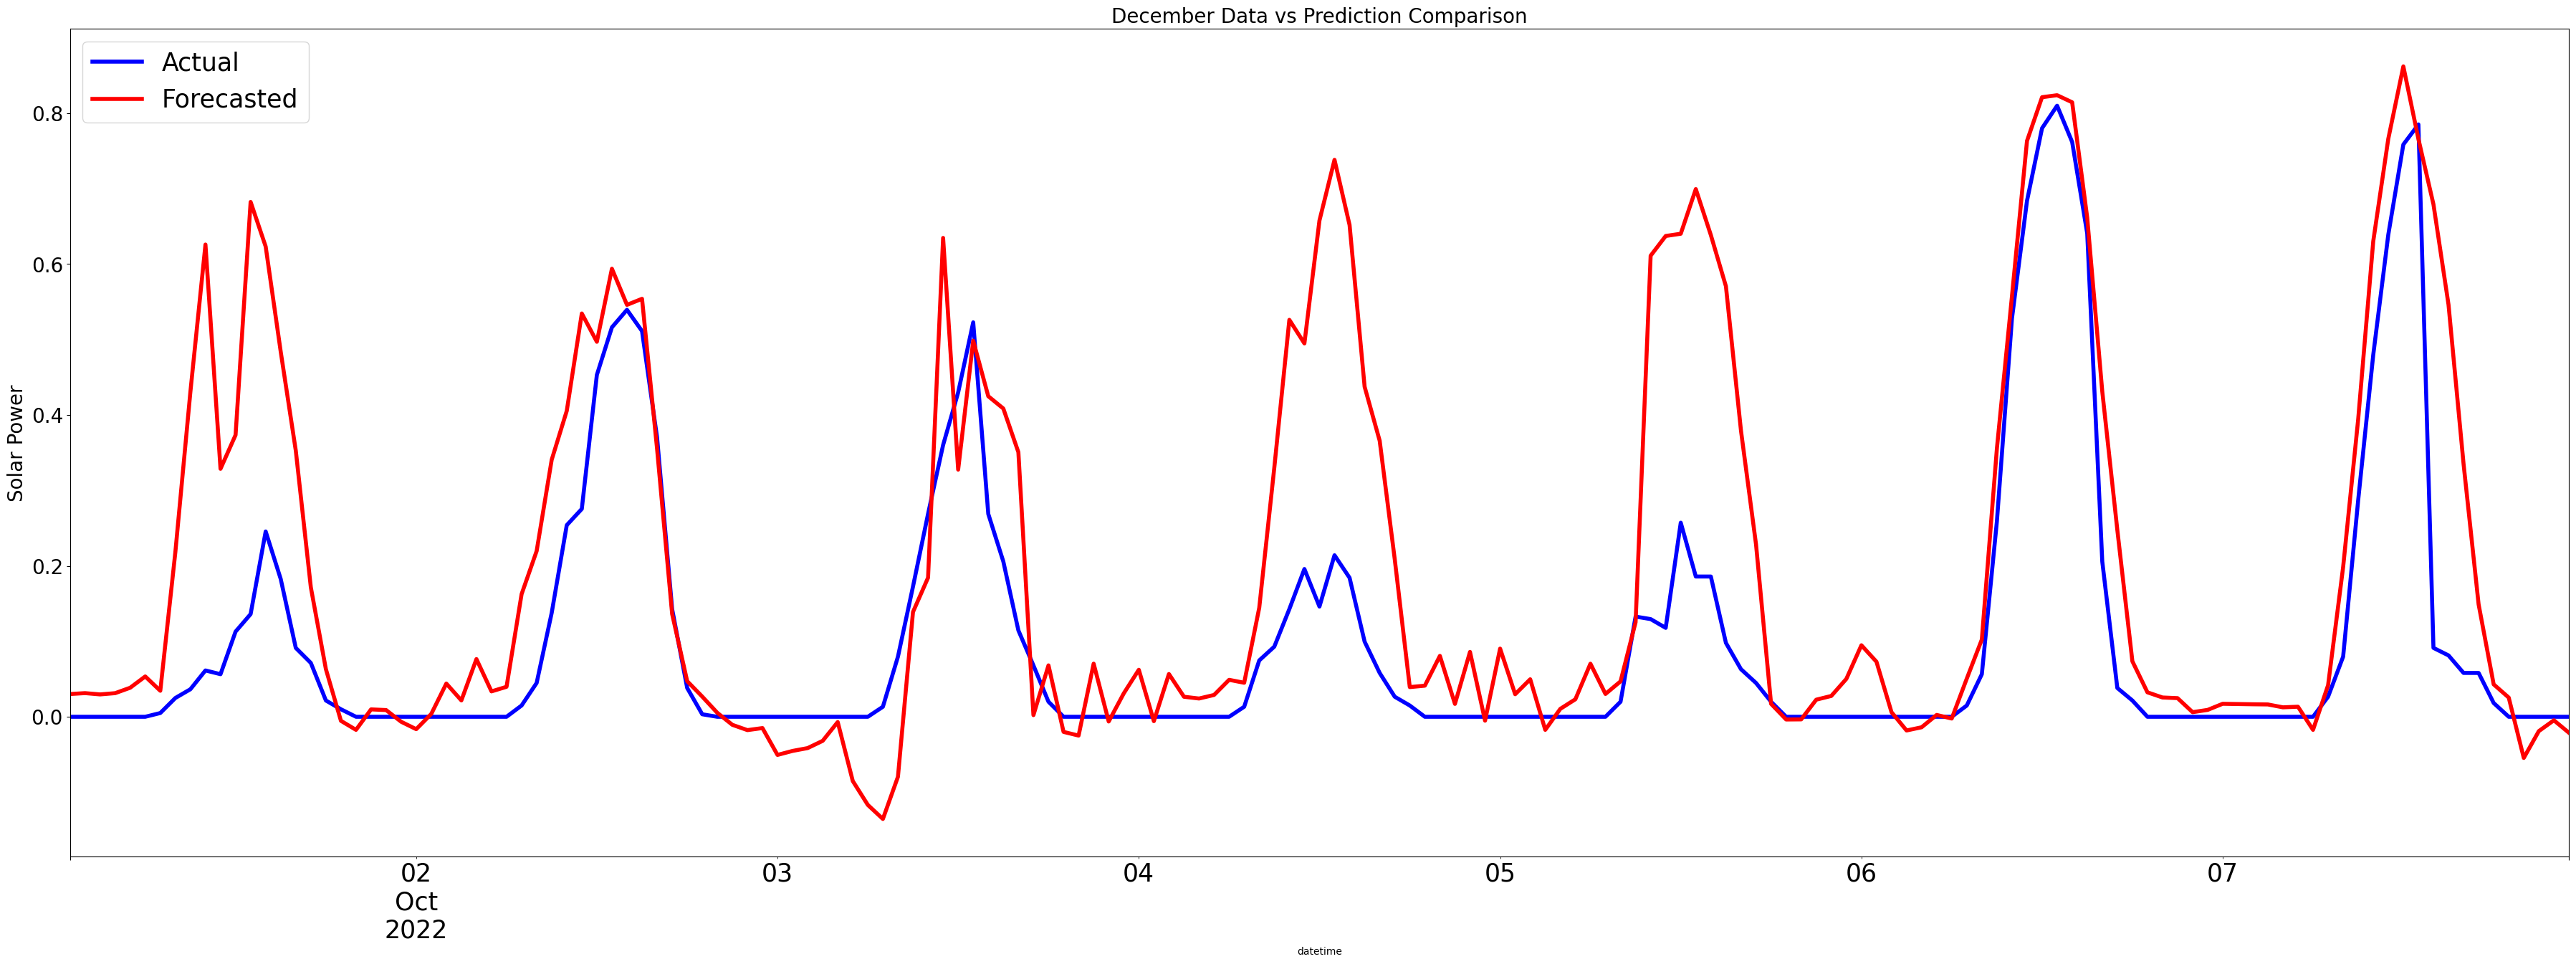

In [75]:
##Printing December predictions on chart to visually assess accuracy
ax = new_df_1.loc[(new_df_1.index > '10-01-2022') & (new_df_1.index < '10-08-2022')]['solarradiation'] \
    .plot(figsize=(45, 15), title='December Data vs Prediction Comparison', color = "blue", linewidth = 4)
new_df_1.loc[(new_df_1.index > '10-01-2022') & (new_df_1.index < '10-08-2022')]['prediction_XGB'] \
    .plot(style='-', color = "red", linewidth = 4, fontsize=25)

plt.title('December Data vs Prediction Comparison', fontsize=20) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.ylabel('Solar Power', fontsize=20) 
plt.legend(['Actual','Forecasted'], fontsize = 25) 

plt.show()